# <p><font color=palevioletred>&#9658; Artificial Neural Networks and Deep Architectures (DD2437) &#9664;</font></p>

<div class="alert alert-success">

Syllabus: https://www.kth.se/student/kurser/kurs/kursplan/DD2437-20191.pdf?lang=en

Course page: https://www.kth.se/social/course/DD2437/

Teacher page: http://www.csc.kth.se/~paherman/index.htm & https://www.kth.se/profile/paherman



# Lab assignment 1
## Learning and generalisation in feed-forward networks from perceptron learning to backprop

</div>

***
# <p> &#127802; Instructions </p>
#### Aim and objectives
After completion of the lab assignment, you should be able to
- design and apply networks in classification, function approximation and generalisation tasks
- identify key limitations of single-layer networks
- configure and monitor the behaviour of learning algorithms for single and multi-layer perceptrons networks
- recognise risks associated with backpropagation and minimise them for robust learning of multi-layer perceptrons.

#### Background
see link https://github.com/tgll/neuralnets_labs/blob/master/lab2/annda_lab1.pdf <br>
(Lab instructions in the same folder)

(Data Representation, Implementation of the Delta rule, Implementation of a two-layer perceptron, Monitoring the learning process and evaluation, Generalisation, regularisation, validation for robust
learning)

<p><font color=white>emojis https://www.w3schools.com/charsets/ref_emoji.asp</font></p>

***
# <p> &#127802; Assignment - Part I </p>

In [1]:
# Importing the librairies
import numpy as np
import math

import matplotlib.pyplot as plt
import matplotlib.colors as clr
from matplotlib.colors import ListedColormap
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import scale

from mpl_toolkits import mplot3d
%matplotlib inline

In [2]:
# cool color palette for later
paletteperso = ["#607EB3", "#FFC6BD", "#B2CC6E"]
paletteperso2 = ["#FFE140", "#6A80FF", "#B1CC1F"]

## <p> &#127804; 1. Classification with a single-layer perceptron </p>
### <p> &#127793; 1.1 Generation of linearly-separable data</p> 
Draw two sets of points/patterns in 2D from multivariate normal distribution. Choose parameters, mA, mB, sigmaA, sigmaB. Generate n=100 points per class and shuffe samples. Plot your patterns with different colours per class.

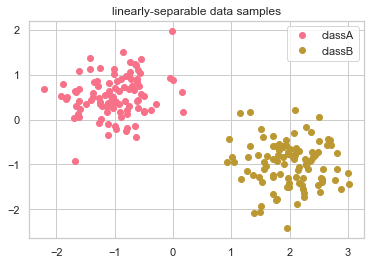

In [3]:
# from the matlab code in page 9 in the Lab assignment 1 pdf
n_points = 100 #nb of points per class
mA = np.array([-1.0, 0.5])
mB = np.array([2.0, -1.0])
sigmaA = 0.5 #variance A
sigmaB = 0.5 #variance B

#generate arrays
classA=np.zeros((2,n_points))
classB=np.zeros((2,n_points))
classA[0]= np.random.randn(1,n_points)*sigmaA +mA[0]
classA[1]= np.random.randn(1,n_points)*sigmaA +mA[1]
classB[0]= np.random.randn(1,n_points)*sigmaB +mB[0]
classB[1]= np.random.randn(1,n_points)*sigmaB +mB[1]

# plot the two classes
sns.set(style="whitegrid")
sns.set_palette("husl")
plt.plot(classA[0],classA[1],'o')
plt.plot(classB[0],classB[1],'o')
#plt.plot([2, -1], [2, -2], 'r-', lw=2)
plt.legend(['classA','classB'])
plt.title('linearly-separable data samples')
plt.show()

In [4]:
# concatenate and shuffe samples
inputs=np.concatenate((classA,classB),axis=1) # X:inputs (feature data)
inputs=np.concatenate((inputs,np.ones((1,2*n_points))))
targets=np.concatenate((np.ones(100),-np.ones(100))) # T:target values
s = np.arange(inputs.shape[1])
np.random.shuffle(s)
inputs=inputs[:,s]
targets=targets[s]
weights=np.random.randn(1, 2+1) # W:weights

### <p> &#127793; 1.2 Classification with a single-layer perceptron and analysis </p>
1. Apply and compare **Perceptron learning** with the **Delta learning** rule in batch mode on the generated dataset.
2. Compare sequential with a batch learning approach for the Delta rule. How quickly (in terms of epochs) do the algorithms converge? How sensitive is learning to random initialisation?
3. Remove the bias, train your network with the Delta rule in batch mode and test its behaviour. In what cases would the perceptron without bias converge and classify correctly all data samples?

**BASIC REMINDERS**:

Single Layer VS Multi-Layer Perceptron (MLP) (img from the well explained cool blog post [Multi-Layer Neural Networks with Sigmoid Function— Deep Learning for Rookies (2) by Nahua Kang
](https://towardsdatascience.com/multi-layer-neural-networks-with-sigmoid-function-deep-learning-for-rookies-2-bf464f09eb7f))
<img src="img/singlelayer2.jpeg" width="500" align="center"/> <br>
Here we will first focus on the single layer perceptron and then we will see the MLP for the non-linear case (todo: put a schema of XOR)


#### <font color=palevioletred>(1) Perceptron learning VS delta learning</font>

**REMINDERS**:
<img src="img/perceptrondeltalearning2.png" height="500" align="center"/>

[F. Rosenblatt. The perceptron, a perceiving and recognizing automaton Project Para. Cornell Aeronautical Laboratory, 1957.](https://blogs.umass.edu/brain-wars/files/2016/03/rosenblatt-1957.pdf)

B. Widrow et al. Adaptive ”Adaline” neuron using chemical ”memistors”. Number Technical Report 1553-2. Stanford Electron. Labs., Stanford, CA, October 1960.


#### a) Delta learning rule

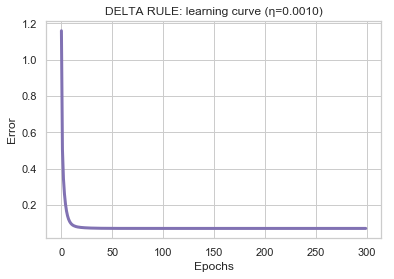

In [5]:
# DELTA LEARNING RULE
# Formula : 
# ∆wi = η(y-w*x)xi
# ∆wi = eta(targets-weights*inputs)xi
#
# Inputs
# X:   inputs (feature data)
# T:   targets
# W:   weights
# eta: learning rate
# epochs:   number of epochs

epochs=300 # number of epochs
eta=0.001 # learning rate

def delta_rule(X, T, W, eta, epochs):
  errors=[]
  for i in range(epochs):
    error=T-W.dot(X) # (y-w*x)
    w_update = eta*error.dot(X.T) # (∆wi = eta(y-w*x)xi)
    W = W + w_update # (wi = wi + ∆wi) update de weights with error
    errors.append(np.mean(np.square(error)))
  return W, errors

# plot of delta rule
plt.plot(delta_rule(inputs, targets, weights, eta, epochs)[1], 'm-', lw=3)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title('DELTA RULE: learning curve (η=%.4f)' %eta)
plt.show()

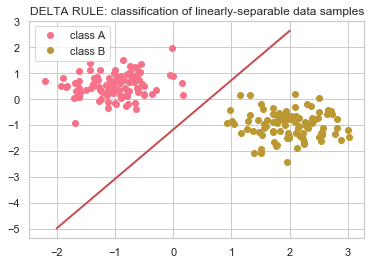

In [6]:
# Testing on the dataset
w1=delta_rule(inputs, targets, weights, eta, epochs)[0][0][0]
w2=delta_rule(inputs, targets, weights, eta, epochs)[0][0][1]
w3=delta_rule(inputs, targets, weights, eta, epochs)[0][0][2]

x=np.linspace(-2,2,100)
y_delta=(-1/w2)*(w1*x+w3)

sns.set(style="whitegrid")
sns.set_palette("husl")
plt.plot(classA[0], classA[1], 'o')
plt.plot(classB[0], classB[1], 'o')
plt.plot(x, y_delta, 'r-', lw=2)
plt.legend(['class A', 'class B'])
plt.title('DELTA RULE: classification of linearly-separable data samples')
plt.show()

#### b) Perceptron Learning rule

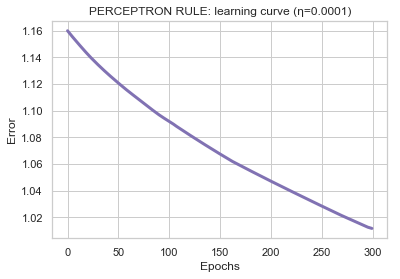

In [7]:
# PERCEPTRON LEARNING RULE
# Formula : 
# ∆wi = η(y-ŷ)xi
# ∆wi = eta(targets-outputs)inputs
#
# Inputs
# X:   inputs (feature data)
# T:   targets
# Y:   yhat (outputs)
# W:   weights
# eta: learning rate
# epochs:   number of epochs

epochs=300 # number of epochs
eta=0.0001 # learning rate

def perceptron_rule(X, T, W, eta, epochs):
  errors=[]
  for i in range(epochs):
    yhat=W.dot(X) # ŷ = w.x
    for i in range(np.shape(yhat)[1]):
      if yhat[0][i]>=0 and T[i]<0:
        W=W-eta*X[:,i] # (∆wi = wi - eta.xi)
      if yhat[0][i]<0 and T[i]>0:
        W=W+eta*X[:,i] # (∆wi = wi + eta.xi)
    error=T-yhat # (y-ŷ)
    errors.append(np.mean(np.square(error)))
  return W, errors


# plot of perceptron rule
plt.plot(perceptron_rule(inputs, targets, weights, eta, epochs)[1], 'm-', lw=3)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title('PERCEPTRON RULE: learning curve (η=%.4f)' %eta)
plt.show()

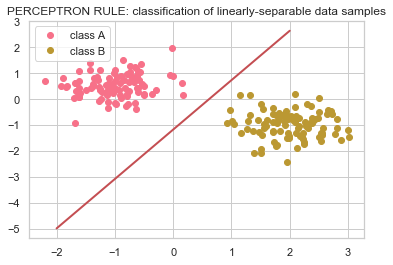

In [8]:
# Testing on the dataset
w4=perceptron_rule(inputs, targets, weights, eta, epochs)[0][0][0]
w5=perceptron_rule(inputs, targets, weights, eta, epochs)[0][0][1]
w6=perceptron_rule(inputs, targets, weights, eta, epochs)[0][0][2]

x=np.linspace(-2,2,100)
y_perceptron=(-1/w2)*(w1*x+w3)

sns.set(style="whitegrid")
sns.set_palette("husl")
plt.plot(classA[0], classA[1], 'o')
plt.plot(classB[0], classB[1], 'o')
plt.plot(x, y_perceptron,'r-', lw=2)
plt.legend(['class A', 'class B'])
plt.title('PERCEPTRON RULE: classification of linearly-separable data samples')
plt.show()

#### Conclusion perceptron VS delta learning rules for classification on linearly-separable data samples

The delta rule seems to be more accurate to classify linearly-separable data samples than the perceptron rule.


#### <font color=palevioletred>(2) Batch learning VS sequential learning</font>

**REMINDERS GRADIENT DESCENT:**<br>
Gradient descent (sometimes called "steepest descent") is a first-order iterative optimization algorithm for finding the minimum of a function. It was originally proposed by Cauchy in 1847 <br>
It is often compared to the gravity movements of water on earth, going down a mountain or a leaf. The goal is to have it converging towards the global minima. 
In machine learning, gradient descent optimisers are useful for the **training** and permit to **select optimal set of weights for the model**.<br>
(Steps: forward propagation → finding costs → backward propagation → finding gradients → updating parameters)
<img src="img/GradientDescent.png" width="850" align="center"/>

<img src="img/GradientDescent_B.png" width="600" align="center"/>

**OPTIMIZERS:**<br>
There are many **gradient descent optimisation algorithms** that exists. I will present few in this reminder section and we will compare two of them in this exercise (Batch learning (BGD) & sequential learning (SGD))<br>
<img src="img/BishopSGD.png" width="400" align="left"/>
"[Pattern Recognition and Machine Learning](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf)", Christopher M. Bishop, Chapter 5.2.4 Gradient descent optimization, p240<br>
<br>
<br>
<br>
3 types of learning:
<img src="img/GradientDescentC.png" width="850" align="center"/>

In the following eq., we have:
* $\mathbf{t}$ time step
* $\mathbf{w}$ weight that we want to update
* $\alpha$ learning rate
* $\mathbf{L} = |\mathbf{ŷ} - \mathbf{y}|$ loss function to minimise (the smaller, the better) <font color=red>(TODO: part on different loss functions (MSE, cross entropy, hinge, ...)</font>
* $\frac{\partial \mathbf{L}}{\partial \mathbf{w}} = \Delta$ gradient of $\mathbf{L}$

|OPTIMISER|YEAR|AUTHOR|Learning Rate|Gradient| FORMULA | Accuracy | Time Consuming |
|:---|:---|:---|:---|:---|:---|:---|:---|
| **<font color=#ce8f31>Batch (BGD)</font>** [1]| 1847 | Cauchy | . | . |<img src="img/opti-BGD.png" width="150" align="left"/>| good | more |
| **Mini Batch (MBGD)** [2a] [2b] [2c]| ? | ? | . | . | . | medium | medium |
| **<font color=#ce8f31>Stochastic (SGD)</font>** [3a] [3b] [3c]| 1952 | Kiefer | . | . |<img src="img/opti-SGD.PNG" width="100" align="left"/>| low | less |
| Momentum [4]| 1964 | Polyak | <font color=white>.</font> | X |<img src="img/opti-Momentum.png" width="150" align="left"/>|
| AdaGrad [5]| 2011 | Duchi | X | <font color=white>.</font> |<img src="img/opti-Adagrad.png" width="150" align="left"/>|
| RMSprop [6]| 2011 | Hinton | X | <font color=white>.</font> |<img src="img/opti-RMSprop.png" width="150" align="left"/>|
| Adadelta [7]| 2012 | Zeiler | X | <font color=white>.</font> |<img src="img/opti-Adadelta.png" width="150" align="left"/>|
| Nesterov (NAG) [8]| 2013 | Sutskever | <font color=white>.</font> | X |<img src="img/opti-Nesterov.png" width="150" align="left"/>|
| Adam [9]| 2014 | Kingma | X | X |<img src="img/opti-Adam.png" width="150" align="left"/>|
| Adamax [10]| 2014 | Kingma | X | X |<img src="img/opti-Adamax.png" width="150" align="left"/>|
| Nadam [11]| 2015 | Dozat | X | X |<img src="img/opti-Nadam.png" width="150" align="left"/>|
| AMSGrad [12]| 2018 | Reddi | X | X |<img src="img/opti-AMSGrad.png" width="150" align="left"/>|

[1] (Cauchy, 1847) [Cauchy, Augustin. "Méthode générale pour la résolution des systemes d’équations simultanées." Comp. Rend. Sci. Paris 25.1847 (1847): 536-538.](https://www.cs.xu.edu/math/Sources/Cauchy/Orbits/1847%20CR%20536(383).pdf)<br>
[2a] (Kramer & Sangiovanni-Vincentelli, 1989) [Kramer, Alan H., and Alberto Sangiovanni-Vincentelli. "Efficient parallel learning algorithms for neural networks." Advances in neural information processing systems. 1989.](http://papers.nips.cc/paper/134-efficient-parallel-learning-algorithms-for-neural-networks.pdf) (they use "mini batches" = subsets of increasing sizes)<br>
[2b] (Møller, PhD thesis, 1993) [Møller, Martin F. "Efficient training of feed-forward neural networks." DAIMI Report Series 464 (1993).](https://tidsskrift.dk/daimipb/article/view/6937/5900) <br>
[2c] (Hinton et al., 2012) [Hinton, Geoffrey, Nitish Srivastava, and Kevin Swersky. "Neural networks for machine learning lecture 6a overview of mini-batch gradient descent." Cited on 14 (2012): 8.](http://www.cs.toronto.edu/~hinton/coursera/lecture6/lec6.pdf) <br>
[3a] (Robbins & Monro, 1951) [Robbins, Herbert, and Sutton Monro. "A stochastic approximation method." The annals of mathematical statistics (1951): 400-407.](https://www.jstor.org/stable/pdf/2236626.pdf?casa_token=nbqo-YjhHTUAAAAA:ypukjRHlzAaMp8sBWJ5USs_PTN1--xgKbWN-AFocowi3YQp1ByKNeawZhxZwwCwJt7SmWIc24zXMW8uG_HExzHWCcpgb7gQaVUmqbL7k_ecT1E0el9c) <br>
[3b] (Kiefer & Wolfowitz, 1952) [Kiefer, Jack, and Jacob Wolfowitz. "Stochastic estimation of the maximum of a regression function." The Annals of Mathematical Statistics 23.3 (1952): 462-466.](https://projecteuclid.org/download/pdf_1/euclid.aoms/1177729392) <br>
[3c] (Bottou et al., 2018) [Bottou, Léon, Frank E. Curtis, and Jorge Nocedal. "Optimization methods for large-scale machine learning." Siam Review 60.2 (2018): 223-311.](https://arxiv.org/pdf/1606.04838.pdf) <br>
[4] (Polyak, 1964) [Polyak, Boris T. "Some methods of speeding up the convergence of iteration methods." USSR Computational Mathematics and Mathematical Physics 4.5 (1964): 1-17.](https://www.researchgate.net/publication/243648538_Some_methods_of_speeding_up_the_convergence_of_iteration_methods)<br>
[5] (Duchi et al., 2011) [Duchi, John, Elad Hazan, and Yoram Singer. "Adaptive subgradient methods for online learning and stochastic optimization." Journal of Machine Learning Research 12.Jul (2011): 2121-2159.](http://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf)<br>
[6] (Hinton et al., 2012) [Tieleman, Tijmen, and Geoffrey Hinton. "Lecture 6.5-rmsprop: Divide the gradient by a running average of its recent magnitude." COURSERA: Neural networks for machine learning 4.2 (2012): 26-31.](http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf) <br>
[7] (Zeiler, 2012) [Zeiler, Matthew D. "ADADELTA: an adaptive learning rate method." arXiv preprint arXiv:1212.5701 (2012).](https://arxiv.org/pdf/1212.5701.pdf) <br>
[8] (Sutskever et al., 2013) [Sutskever, Ilya, et al. "On the importance of initialization and momentum in deep learning." International conference on machine learning. 2013.](http://proceedings.mlr.press/v28/sutskever13.pdf) <br>
[9] (Kingma & Ba, 2014) [Kingma, Diederik P., and Jimmy Ba. "Adam: A method for stochastic optimization." arXiv preprint arXiv:1412.6980 (2014).](https://arxiv.org/pdf/1412.6980.pdf) <br>
[10] (Kingma & Ba, 2014) [Kingma, Diederik P., and Jimmy Ba. "Adam: A method for stochastic optimization." arXiv preprint arXiv:1412.6980 (2014).](https://arxiv.org/pdf/1412.6980.pdf) <br>
[11] (Dozat, 2015) [Dozat, Timothy. "Incorporating nesterov momentum into adam." (2016).](http://cs229.stanford.edu/proj2015/054_report.pdf) <br>
[12] (Reddi et al., 2018) [Reddi, Sashank J., Satyen Kale, and Sanjiv Kumar. "On the convergence of adam and beyond." arXiv preprint arXiv:1904.09237 (2019).](https://openreview.net/pdf?id=ryQu7f-RZ) <br>
<br>
Mindmap of optimizers (part of the map "[Cognitive Sciences Related Knowledge](https://coggle.it/diagram/XbOLnq4hARCMvhuY/t/cognitive-sciences-related-knowledge)")
<img src="img/OptimizersMindmap.png" width="600" align="center"/>


**SOME MATHS:**<br>
We have the following formula for the gradient descent:<br>
\begin{equation*}
\mathbf{w}_{t+1} =  \mathbf{w}_t - \alpha \frac{\partial}{\partial \mathbf{w}_t} J(\mathbf{w}_t)
\end{equation*}
\begin{equation*}
\theta_{t+1} =  \theta_t - \alpha \frac{\partial}{\partial \theta_t} J(\theta_t)
\end{equation*}

After calculus operations on the derivative, we obtain:<br>
\begin{equation*}
\mathbf{w}_{t+1} = \mathbf{w}_t - \frac{\alpha}{m}\sum_{i=1}^m\left[h_\mathbf{w_t}\left(x^{(i)}\right)-y^{(i)}\right]\,x_j^{(i)}
\end{equation*}
\begin{equation*}
\theta_{t+1} = \theta_t - \frac{\alpha}{m}\sum_{i=1}^m\left[h_\mathbf{\theta_t}\left(x^{(i)}\right)-y^{(i)}\right]\,x_j^{(i)}
\end{equation*}


The intermediary states are:<br>
\begin{equation*}
\small 
\frac{\partial J(\theta)}{\partial \theta_j}  = 
\frac{\partial}{\partial \theta_j} \,\frac{-1}{m}\sum_{i=1}^m 
\left[ y^{(i)}\log\left(h_\theta \left(x^{(i)}\right)\right) +
(1 -y^{(i)})\log\left(1-h_\theta \left(x^{(i)}\right)\right)\right] (1)
\\[2ex]\small\underset{\text{linearity}}= \,\frac{-1}{m}\,\sum_{i=1}^m 
\left[ 
y^{(i)}\frac{\partial}{\partial \theta_j}\log\left(h_\theta \left(x^{(i)}\right)\right) +
(1 -y^{(i)})\frac{\partial}{\partial \theta_j}\log\left(1-h_\theta \left(x^{(i)}\right)\right)
\right] (2)
\\[2ex]\Tiny\underset{\text{chain rule}}= \,\frac{-1}{m}\,\sum_{i=1}^m 
\left[ 
y^{(i)}\frac{\frac{\partial}{\partial \theta_j}h_\theta \left(x^{(i)}\right)}{h_\theta\left(x^{(i)}\right)} +
(1 -y^{(i)})\frac{\frac{\partial}{\partial \theta_j}\left(1-h_\theta \left(x^{(i)}\right)\right)}{1-h_\theta\left(x^{(i)}\right)}
\right] (3)
\\[2ex]\small\underset{h_\theta(x)=\sigma\left(\theta^\top x\right)}=\,\frac{-1}{m}\,\sum_{i=1}^m 
\left[ 
y^{(i)}\frac{\frac{\partial}{\partial \theta_j}\sigma\left(\theta^\top x^{(i)}\right)}{h_\theta\left(x^{(i)}\right)} +
(1 -y^{(i)})\frac{\frac{\partial}{\partial \theta_j}\left(1-\sigma\left(\theta^\top x^{(i)}\right)\right)}{1-h_\theta\left(x^{(i)}\right)}
\right] (4)
\\[2ex]\Tiny\underset{\sigma'}=\frac{-1}{m}\,\sum_{i=1}^m 
\left[ y^{(i)}\,
\frac{\sigma\left(\theta^\top x^{(i)}\right)\left(1-\sigma\left(\theta^\top x^{(i)}\right)\right)\frac{\partial}{\partial \theta_j}\left(\theta^\top x^{(i)}\right)}{h_\theta\left(x^{(i)}\right)} -
(1 -y^{(i)})\,\frac{\sigma\left(\theta^\top x^{(i)}\right)\left(1-\sigma\left(\theta^\top x^{(i)}\right)\right)\frac{\partial}{\partial \theta_j}\left(\theta^\top x^{(i)}\right)}{1-h_\theta\left(x^{(i)}\right)}
\right] (5)
\\[2ex]\small\underset{\sigma\left(\theta^\top x\right)=h_\theta(x)}= \,\frac{-1}{m}\,\sum_{i=1}^m 
\left[ 
y^{(i)}\frac{h_\theta\left( x^{(i)}\right)\left(1-h_\theta\left( x^{(i)}\right)\right)\frac{\partial}{\partial \theta_j}\left(\theta^\top x^{(i)}\right)}{h_\theta\left(x^{(i)}\right)} -
(1 -y^{(i)})\frac{h_\theta\left( x^{(i)}\right)\left(1-h_\theta\left(x^{(i)}\right)\right)\frac{\partial}{\partial \theta_j}\left( \theta^\top x^{(i)}\right)}{1-h_\theta\left(x^{(i)}\right)}
\right] (6)
\\[2ex]\small\underset{\frac{\partial}{\partial \theta_j}\left(\theta^\top x^{(i)}\right)=x_j^{(i)}}=\,\frac{-1}{m}\,\sum_{i=1}^m \left[y^{(i)}\left(1-h_\theta\left(x^{(i)}\right)\right)x_j^{(i)}-
\left(1-y^{i}\right)\,h_\theta\left(x^{(i)}\right)x_j^{(i)}
\right] (7)
\\[2ex]\small\underset{\text{distribute}}=\,\frac{-1}{m}\,\sum_{i=1}^m \left[y^{i}-y^{i}h_\theta\left(x^{(i)}\right)-
h_\theta\left(x^{(i)}\right)+y^{(i)}h_\theta\left(x^{(i)}\right)
\right]\,x_j^{(i)} (8)
\\[2ex]\small\underset{\text{cancel}}=\,\frac{-1}{m}\,\sum_{i=1}^m \left[y^{(i)}-h_\theta\left(x^{(i)}\right)\right]\,x_j^{(i)} (9)
\\[2ex]\small=\frac{1}{m}\sum_{i=1}^m\left[h_\theta\left(x^{(i)}\right)-y^{(i)}\right]\,x_j^{(i)} (10)
\end{equation*}

With the derivative of the sigmoid function $\sigma$ in $\mathbf{(5)}$:
\begin{align}\small\frac{d}{dx}\sigma(x)&=\frac{d}{dx}\left(\frac{1}{1+e^{-x}}\right)\\[2ex]
&=\small\frac{-(1+e^{-x})'}{(1+e^{-x})^2}\\[2ex]
&=\small\frac{e^{-x}}{(1+e^{-x})^2}\\[2ex]
&=\small\left(\frac{1}{1+e^{-x}}\right)\left(\frac{e^{-x}}{1+e^{-x}}\right)\\[2ex]
&=\small\left(\frac{1}{1+e^{-x}}\right)\,\left(\frac{1+e^{-x}}{1+e^{-x}}-\frac{1}{1+e^{-x}}\right)\\[2ex]
&=\small\sigma(x)\,\left(\frac{1+e^{-x}}{1+e^{-x}}-\sigma(x)\right)\\[2ex]
&=\small\sigma(x)\,(1-\sigma(x))
\end{align}


**SOME MEMES:** <br>
(To relax after maths)<br>
<img src="img/MLmeme86.png" width="300" align="left"/>
<img src="img/MLmeme116.png" width="214" align="left"/>
<img src="img/MLmeme120.png" width="450" align="left"/>

#### a) batch (BGD)

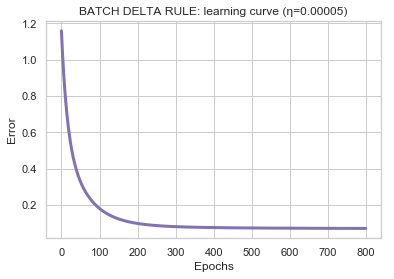

In [9]:
epochs=800
eta=0.00005

# plot of batch Delta rule
plt.plot(delta_rule(inputs, targets, weights, eta, epochs)[1], 'm-', lw=3)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title('BATCH DELTA RULE: learning curve (η=%.5f)' %eta)
plt.show()

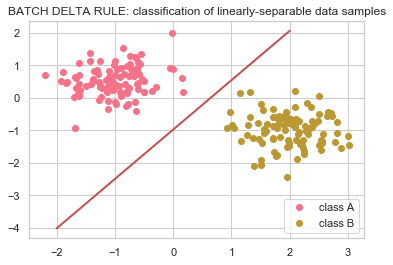

In [10]:
# Testing on the dataset
w7=delta_rule(inputs, targets, weights, eta, epochs)[0][0][0]
w8=delta_rule(inputs, targets, weights, eta, epochs)[0][0][1]
w9=delta_rule(inputs, targets, weights, eta, epochs)[0][0][2]

x=np.linspace(-2,2,100)
y_deltabatch=(-1/w8)*(w7*x+w9)

sns.set(style="whitegrid")
sns.set_palette("husl")
plt.plot(classA[0], classA[1], 'o')
plt.plot(classB[0], classB[1], 'o')
plt.plot(x, y_deltabatch, 'r-', lw=2)
plt.legend(['class A','class B'])
plt.title('BATCH DELTA RULE: classification of linearly-separable data samples')
plt.show()

#### b) sequential (SGD)

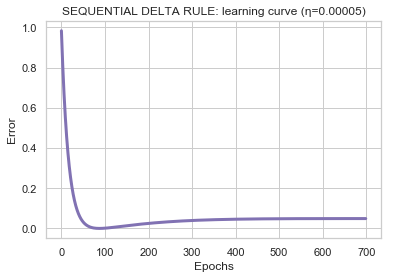

In [11]:
# Formula : 
#
# Inputs
# X:   inputs (feature data)
# T:   targets
# W:   weights
# eta: learning rate
# epochs:   number of epochs
epochs=700
eta=0.00005

def sequential_delta_rule(X, T, W, eta, epochs):
  errors=[]
  for i in range(epochs):
    for k in range(np.shape(T)[0]):
      tmp=[]
      error=W.dot(X[:,k])-T[k]
      tmp.append(error**2)
      W=W-eta*error*X[:,k].T  # ∆wi = wi - eta() update de weights with error
    errors.append(np.mean(tmp))
  return W, errors

# plot of sequential Delta rule
plt.plot(sequential_delta_rule(inputs, targets, weights, eta, epochs)[1], 'm-', lw=3)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title('SEQUENTIAL DELTA RULE: learning curve (η=%.5f)' %eta)
plt.show()

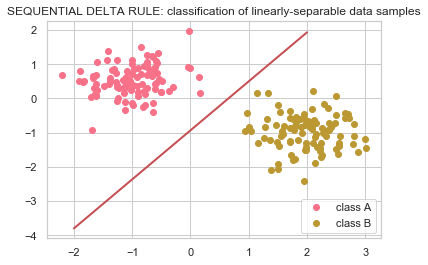

In [12]:
# Testing on the dataset
w10=sequential_delta_rule(inputs, targets, weights, eta, epochs)[0][0][0]
w11=sequential_delta_rule(inputs, targets, weights, eta, epochs)[0][0][1]
w12=sequential_delta_rule(inputs, targets, weights, eta, epochs)[0][0][2]

x=np.linspace(-2,2,100)
y_deltaseq=(-1/w11)*(w10*x+w12)

sns.set(style="whitegrid")
sns.set_palette("husl")
plt.plot(classA[0], classA[1], 'o')
plt.plot(classB[0], classB[1], 'o')
plt.plot(x, y_deltaseq, 'r-', lw=2)
plt.legend(['class A','class B'])
plt.title('SEQUENTIAL DELTA RULE: classification of linearly-separable data samples')
plt.show()

**Conclusion batch learning VS sequential learning for classification on linearly-separable data samples**

Both methods seems to converge towards zero and to be about the same convergence speed, non of them seems to be breathtaking, 

#### <font color=palevioletred>(3) bias ? </font>

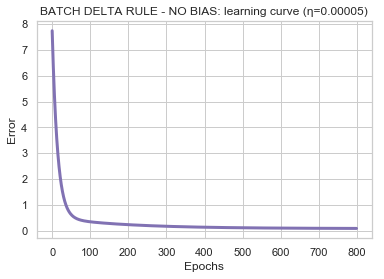

In [13]:
epochs=800
eta=0.00005

mA = np.array([-1.0, 0.5])
mB = np.array([2.0, -1.0])

#generate arrays
classA=np.zeros((2,n_points))
classB=np.zeros((2,n_points))
classA[0]= np.random.randn(1,n_points)*sigmaA +mA[0]
classA[1]= np.random.randn(1,n_points)*sigmaA +mA[1]
classB[0]= np.random.randn(1,n_points)*sigmaB +mB[0]
classB[1]= np.random.randn(1,n_points)*sigmaB +mB[1]

# concatenate and shuffe samples
inputs=np.concatenate((classA,classB),axis=1) # X:inputs (feature data)
inputs=np.concatenate((inputs,np.ones((1,2*n_points))))
targets=np.concatenate((np.ones(100),-np.ones(100))) # T:target values
s = np.arange(inputs.shape[1])
np.random.shuffle(s)
inputs=inputs[:,s]
targets=targets[s]
weights=np.random.randn(1, 2+1) # W:weights

# plot of batch Delta rule
plt.plot(delta_rule(inputs, targets, weights, eta, epochs)[1], 'm-', lw=3)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title('BATCH DELTA RULE - NO BIAS: learning curve (η=%.5f)' %eta)
plt.show()

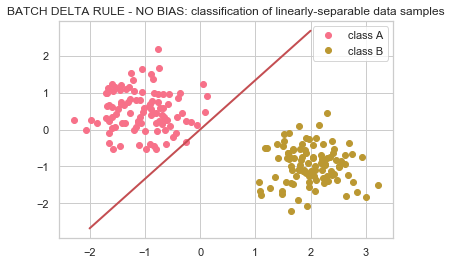

In [14]:
w13=delta_rule(inputs, targets, weights, eta, epochs)[0][0][0]
w14=delta_rule(inputs, targets, weights, eta, epochs)[0][0][1]

x=np.linspace(-2,2,100)
y_delt=x*(-w13/w14) # no bias, with bias, it would be (-1/w14)*(w13*x+w15)

sns.set(style="whitegrid")
sns.set_palette("husl")
plt.plot(classA[0], classA[1], 'o')
plt.plot(classB[0], classB[1], 'o')
plt.plot(x, y_delt, 'r-', lw=2)
plt.legend(['class A','class B'])
plt.title('BATCH DELTA RULE - NO BIAS: classification of linearly-separable data samples')
plt.show()

not amazing + go through the origin because of the linearity of the function without the bias, so if the points are arround the origin, it will be lame

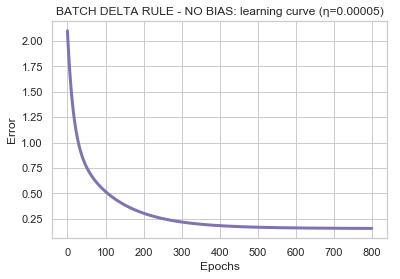

In [15]:
mA = np.array([0.0, 0.0]) #arround the origin
mB = np.array([2.0, -1.0])

#generate arrays
classA=np.zeros((2,n_points))
classB=np.zeros((2,n_points))
classA[0]= np.random.randn(1,n_points)*sigmaA +mA[0]
classA[1]= np.random.randn(1,n_points)*sigmaA +mA[1]
classB[0]= np.random.randn(1,n_points)*sigmaB +mB[0]
classB[1]= np.random.randn(1,n_points)*sigmaB +mB[1]

# concatenate and shuffe samples
inputs=np.concatenate((classA,classB),axis=1) # X:inputs (feature data)
inputs=np.concatenate((inputs,np.ones((1,2*n_points))))
targets=np.concatenate((np.ones(100),-np.ones(100))) # T:target values
s = np.arange(inputs.shape[1])
np.random.shuffle(s)
inputs=inputs[:,s]
targets=targets[s]
weights=np.random.randn(1, 2+1) # W:weights

# plot of batch Delta rule
plt.plot(delta_rule(inputs, targets, weights, eta, epochs)[1], 'm-', lw=3)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title('BATCH DELTA RULE - NO BIAS: learning curve (η=%.5f)' %eta)
plt.show()

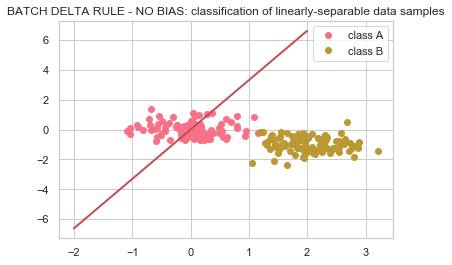

In [16]:
w15=delta_rule(inputs, targets, weights, eta, epochs)[0][0][0]
w16=delta_rule(inputs, targets, weights, eta, epochs)[0][0][1]

x=np.linspace(-2,2,100)
y_deltb=x*(-w15/w16) # still no bias, with bias it would be (-1/w16)*(w15*x+w17)

sns.set(style="whitegrid")
sns.set_palette("husl")
plt.plot(classA[0], classA[1], 'o')
plt.plot(classB[0], classB[1], 'o')
plt.plot(x, y_deltb, 'r-', lw=2)
plt.legend(['class A','class B'])
plt.title('BATCH DELTA RULE - NO BIAS: classification of linearly-separable data samples')
plt.show()

à chier / lame / c nul

**Conclusion removing bias in the delta rule for classification on linearly-separable data samples**

the perceptron cannot classify the data that goes through the origin when the bias is removed

### <p> &#127793; 1.3 Classification of samples that are not linearly separable </p>

Here we study how perceptron deals with data samples that are not linearly separable. <br>
Part 1
- Generate first a dataset. you can make the means of the two multivariate normal distributions more similar and/or increase the spreads. As a result, you should see that the two clouds of points (corresponding to the two classes) overlap when you plot the samples.
- Apply and compare perceptron learning and the Delta rules using either batch or sequential learning mode, similarly as in the previous exercise <br>

Part 2
- In the second part of the exercise, generate a different version of linearly non-separable dataset in the following way:
<img src="img/exercise313.png" width="400" align="center"/>

**<font color=palevioletred> Part 1: generate dataset</font>**

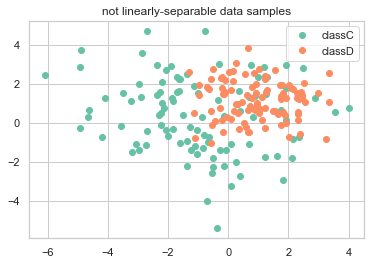

In [17]:
# from the matlab code in page 9 in the Lab assignment 1 pdf BUT NOT LINEARY SEPARABLE (overlapping)
n_points = 100 #nb of points per class
mC = np.array([-1.0, 0.5]) 
mD = np.array([1.0, 1.0])
sigmaC = 2 #variance (more spread)
sigmaD = 1.1 #variance

#generate arrays
classC=np.zeros((2,n_points))
classD=np.zeros((2,n_points))
classC[0]= np.random.randn(1,n_points)*sigmaC +mC[0]
classC[1]= np.random.randn(1,n_points)*sigmaC +mC[1]
classD[0]= np.random.randn(1,n_points)*sigmaD +mD[0]
classD[1]= np.random.randn(1,n_points)*sigmaD +mD[1]

# plot the two classes
sns.set(style="whitegrid")
sns.set_palette("Set2")
plt.plot(classC[0],classC[1],'o')
plt.plot(classD[0],classD[1],'o')
plt.legend(['classC','classD'])
plt.title('not linearly-separable data samples')
plt.show()

In [18]:
# concatenate and shuffe samples
inputs=np.concatenate((classC,classD),axis=1) # X:inputs (feature data)
inputs=np.concatenate((inputs,np.ones((1,2*n_points))))
targets=np.concatenate((np.ones(100),-np.ones(100))) # T:target values
s = np.arange(inputs.shape[1])
np.random.shuffle(s)
inputs=inputs[:,s]
targets=targets[s]
weights=np.random.randn(1, 2+1) # W:weights

**<font color=palevioletred>Part 1: compare Perceptron VS Delta Batch VS Delta Sequential</font>** <br>
(a) Perceptron

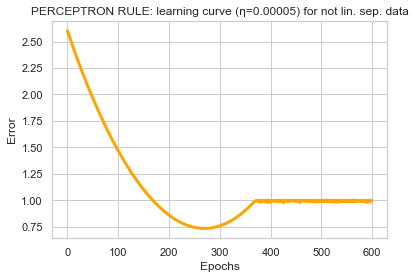

In [19]:
epochs = 600
eta = 0.00005
# plot of perceptron rule
plt.plot(perceptron_rule(inputs, targets, weights, eta, epochs)[1], color='orange', lw=3)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title('PERCEPTRON RULE: learning curve (η=%.5f) for not lin. sep. data' %eta)
plt.show()

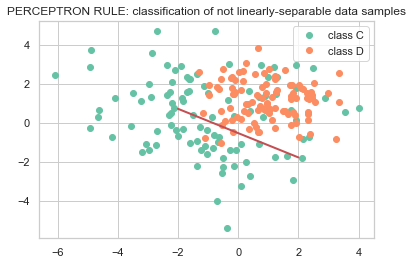

In [20]:
w17=perceptron_rule(inputs, targets, weights, eta, epochs)[0][0][0]
w18=perceptron_rule(inputs, targets, weights, eta, epochs)[0][0][1]
w19=perceptron_rule(inputs, targets, weights, eta, epochs)[0][0][2]

x=np.linspace(-2,2,100)
y_perceptronnotlinsep=(-1/w18)*(w17*x+w19)

sns.set(style="whitegrid")
sns.set_palette("Set2")
plt.plot(classC[0], classC[1], 'o')
plt.plot(classD[0], classD[1], 'o')
plt.plot(x, y_perceptronnotlinsep, 'r-', lw=2)
plt.legend(['class C','class D'])
plt.title('PERCEPTRON RULE: classification of not linearly-separable data samples')
plt.show()

(b) Batch Delta Rule

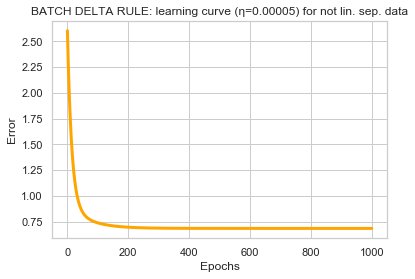

In [21]:
epochs = 1000
eta = 0.00005

# plot of batch delta rule
plt.plot(delta_rule(inputs, targets, weights, eta, epochs)[1], color='orange', lw=3)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title('BATCH DELTA RULE: learning curve (η=%.5f) for not lin. sep. data' %eta)
plt.show()

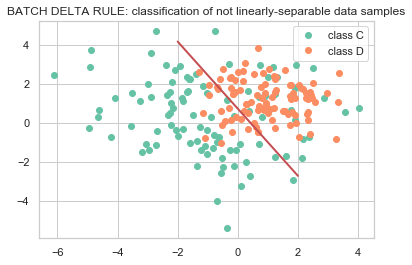

In [22]:
w20=delta_rule(inputs, targets, weights, eta, epochs)[0][0][0]
w21=delta_rule(inputs, targets, weights, eta, epochs)[0][0][1]
w22=delta_rule(inputs, targets, weights, eta, epochs)[0][0][2]

x=np.linspace(-2,2,100)
y_batchdeltanotlinsep=(-1/w21)*(w20*x+w22) # still no bias, with bias it would be (-1/w16)*(w15*x+w17)

sns.set(style="whitegrid")
sns.set_palette("Set2")
plt.plot(classC[0], classC[1], 'o')
plt.plot(classD[0], classD[1], 'o')
plt.plot(x, y_batchdeltanotlinsep, 'r-', lw=2)
plt.legend(['class C','class D'])
plt.title('BATCH DELTA RULE: classification of not linearly-separable data samples')
plt.show()

(c) Sequential

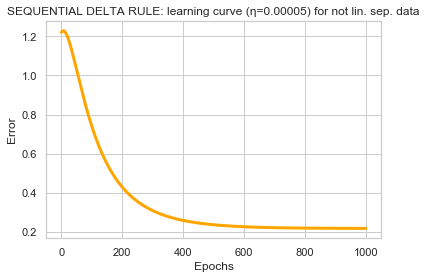

In [23]:
epochs = 1000
eta = 0.00005

# plot of sequential delta rule
plt.plot(sequential_delta_rule(inputs, targets, weights, eta, epochs)[1], color='orange', lw=3)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title('SEQUENTIAL DELTA RULE: learning curve (η=%.5f) for not lin. sep. data' %eta)
plt.show()

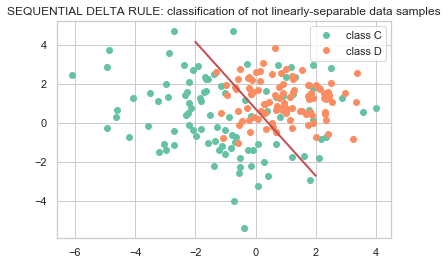

In [24]:
w23=sequential_delta_rule(inputs, targets, weights, eta, epochs)[0][0][0]
w24=sequential_delta_rule(inputs, targets, weights, eta, epochs)[0][0][1]
w25=sequential_delta_rule(inputs, targets, weights, eta, epochs)[0][0][2]

x=np.linspace(-2,2,100)
y_seqdeltanotlinsep=(-1/w24)*(w23*x+w25)

sns.set(style="whitegrid")
sns.set_palette("Set2")
plt.plot(classC[0], classC[1], 'o')
plt.plot(classD[0], classD[1], 'o')
plt.plot(x, y_seqdeltanotlinsep, 'r-', lw=2)
plt.legend(['class C','class D'])
plt.title('SEQUENTIAL DELTA RULE: classification of not linearly-separable data samples')
plt.show()

**Conclusion comparaison Perceptron VS Delta Batch VS Delta Sequential**

they all converge to zero

delta seems faster than perceptron

**<font color=palevioletred>Part 2: generate dataset from code p11</font>**

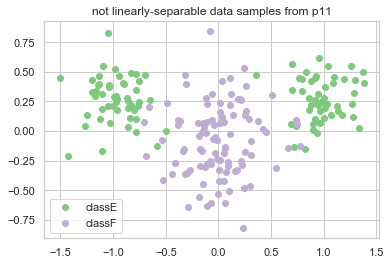

In [25]:
# from the matlab code in page 11 in the Lab assignment 1 pdf
epochs = 1000
ndata = 100 #nb of points per class
mE = np.array([1, 0.3])
mF = np.array([0, -0.1])
sigmaE = 0.2 #variance
sigmaF = 0.3 #variance

#generate arrays
classE=np.zeros((2,ndata))
classF=np.zeros((2,ndata))
classE[0]= np.concatenate((np.random.randn(1,int(0.5*ndata))*sigmaE-mE[0],
                           np.random.randn(1,int(0.5*ndata))*sigmaE+mE[0]),
                          axis=1)
np.random.randn(1,ndata)*sigmaE +mE[0]
classE[1]= np.random.randn(1,ndata)*sigmaE +mE[1]
classF[0]= np.random.randn(1,ndata)*sigmaF +mF[0]
classF[1]= np.random.randn(1,ndata)*sigmaF +mF[1]
classE=classE.T
classF=classF.T
np.random.shuffle(classE)
np.random.shuffle(classF)
classE=classE.T
classF=classF.T #ici

# plot the two classes
sns.set(style="whitegrid")
sns.set_palette("Accent")
plt.plot(classE[0],classE[1],'o')
plt.plot(classF[0],classF[1],'o')
plt.legend(['classE','classF'])
plt.title('not linearly-separable data samples from p11')
plt.show()

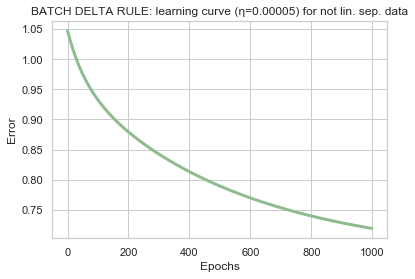

In [26]:
# concatenate and shuffe samples
inputs=np.concatenate((classE,classF),axis=1) # X:inputs (feature data)
inputs=np.concatenate((inputs,np.ones((1,2*n_points))))
targets=np.concatenate((np.ones(100),-np.ones(100))) # T:target values
s = np.arange(inputs.shape[1])
np.random.shuffle(s)
inputs=inputs[:,s]
targets=targets[s]
weights=np.random.randn(1, 2+1) # W:weights

# plot the new dataset learning curve
plt.plot(delta_rule(inputs, targets, weights, eta, epochs)[1], color='darkseagreen', lw=3)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title('BATCH DELTA RULE: learning curve (η=%.5f) for not lin. sep. data' %eta)
plt.show()

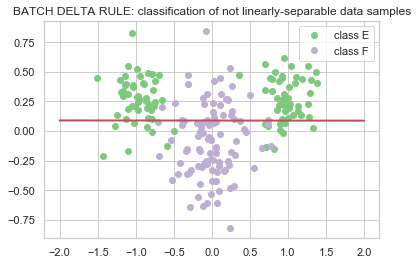

In [27]:
w1a=delta_rule(inputs, targets, weights, eta, epochs)[0][0][0]
w1b=delta_rule(inputs, targets, weights, eta, epochs)[0][0][1]
w1c=delta_rule(inputs, targets, weights, eta, epochs)[0][0][2]

x=np.linspace(-2,2,100)
y_batchdeltanotlinsep=(-1/w1b)*(w1a*x+w1c)

sns.set(style="whitegrid")
sns.set_palette("Accent")
plt.plot(classE[0], classE[1], 'o')
plt.plot(classF[0], classF[1], 'o')
plt.plot(x, y_batchdeltanotlinsep, 'r-', lw=2)
plt.legend(['class E','class F'])
plt.title('BATCH DELTA RULE: classification of not linearly-separable data samples')
plt.show()

(a) random 25% from each class

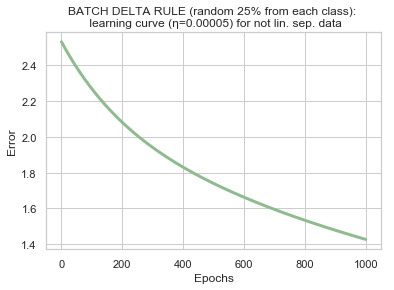

In [28]:
# 25%
classE_25=classE[:,:int(0.25*ndata)]
classF_25=classF[:,:int(0.25*ndata)]

# concatenate and shuffe samples
inputs=np.concatenate((classE_25,classF_25),axis=1) # X:inputs (feature data)
inputs=np.concatenate((inputs,np.ones((1,np.shape(inputs)[1]))))
targets=np.concatenate((np.ones(int(0.5*np.shape(inputs)[1])),-np.ones(int(0.5*np.shape(inputs)[1])))) # T:target values
s = np.arange(inputs.shape[1])
np.random.shuffle(s)
inputs=inputs[:,s]
targets=targets[s]
weights=np.random.randn(1, 2+1) # W:weights

# plot the new dataset learning curve
plt.plot(delta_rule(inputs, targets, weights, eta, epochs)[1], color='darkseagreen', lw=3)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title('BATCH DELTA RULE (random 25%% from each class): \n learning curve (η=%.5f) for not lin. sep. data' %eta)
plt.show()

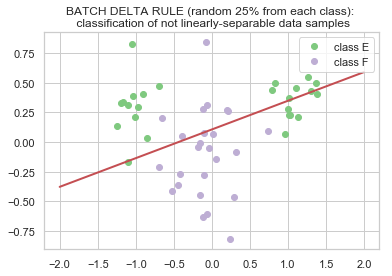

In [29]:
w1a25=delta_rule(inputs, targets, weights, eta, epochs)[0][0][0]
w1b25=delta_rule(inputs, targets, weights, eta, epochs)[0][0][1]
w1c25=delta_rule(inputs, targets, weights, eta, epochs)[0][0][2]

x=np.linspace(-2,2,100)
y_batchdeltanotlinsep25=(-1/w1b25)*(w1a25*x+w1c25)

sns.set(style="whitegrid")
sns.set_palette("Accent")
plt.plot(classE_25[0], classE_25[1], 'o')
plt.plot(classF_25[0], classF_25[1], 'o')
plt.plot(x, y_batchdeltanotlinsep25, 'r-', lw=2)
plt.legend(['class E','class F'])
plt.title('BATCH DELTA RULE (random 25% from each class): \n classification of not linearly-separable data samples')
plt.show()

(b) random 50% from class E

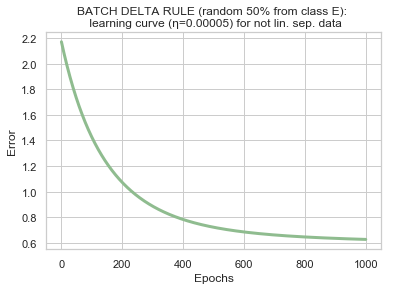

In [30]:
# 50% from E
classE_50E=classE[:,:int(0.5*ndata)]
classF_50E=classF

# concatenate and shuffe samples
inputs=np.concatenate((classE_50E,classF_50E),axis=1) # X:inputs (feature data)
inputs=np.concatenate((inputs,np.ones((1,np.shape(inputs)[1]))))
targets=np.concatenate((np.ones(np.shape(classE_50E)[1]),-np.ones(np.shape(classF_50E)[1]))) # T:target values
s = np.arange(inputs.shape[1])
np.random.shuffle(s)
inputs=inputs[:,s]
targets=targets[s]
weights=np.random.randn(1, 2+1) # W:weights

# plot the new dataset learning curve
plt.plot(delta_rule(inputs, targets, weights, eta, epochs)[1], color='darkseagreen', lw=3)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title('BATCH DELTA RULE (random 50%% from class E): \n learning curve (η=%.5f) for not lin. sep. data' %eta)
plt.show()

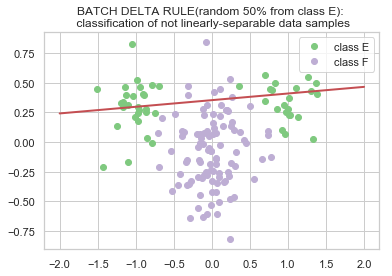

In [31]:
w1a50E=delta_rule(inputs, targets, weights, eta, epochs)[0][0][0]
w1b50E=delta_rule(inputs, targets, weights, eta, epochs)[0][0][1]
w1c50E=delta_rule(inputs, targets, weights, eta, epochs)[0][0][2]

x=np.linspace(-2,2,100)
y_batchdeltanotlinsep50E=(-1/w1b50E)*(w1a50E*x+w1c50E)

sns.set(style="whitegrid")
sns.set_palette("Accent")
plt.plot(classE_50E[0], classE_50E[1], 'o')
plt.plot(classF_50E[0], classF_50E[1], 'o')
plt.plot(x, y_batchdeltanotlinsep50E, 'r-', lw=2)
plt.legend(['class E','class F'])
plt.title('BATCH DELTA RULE(random 50% from class E): \n classification of not linearly-separable data samples')
plt.show()

(c) random 50% from class F

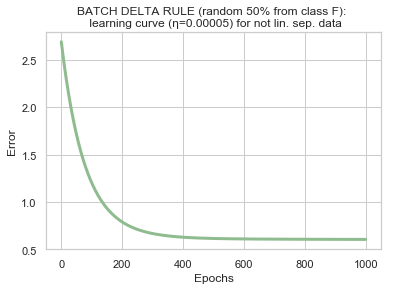

In [34]:
# 50% from F
classE_50F=classE
classF_50F=classF[:,:int(0.5*ndata)]

# concatenate and shuffe samples
inputs=np.concatenate((classE_50F,classF_50F),axis=1) # X:inputs (feature data)
inputs=np.concatenate((inputs,np.ones((1,np.shape(inputs)[1]))))
targets=np.concatenate((np.ones(np.shape(classE_50F)[1]),-np.ones(np.shape(classF_50F)[1]))) # T:target values
s = np.arange(inputs.shape[1])
np.random.shuffle(s)
inputs=inputs[:,s]
targets=targets[s]
weights=np.random.randn(1, 2+1) # W:weights

# plot the new dataset learning curve
plt.plot(delta_rule(inputs, targets, weights, eta, epochs)[1], color='darkseagreen', lw=3)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title('BATCH DELTA RULE (random 50%% from class F): \n learning curve (η=%.5f) for not lin. sep. data' %eta)
plt.show()

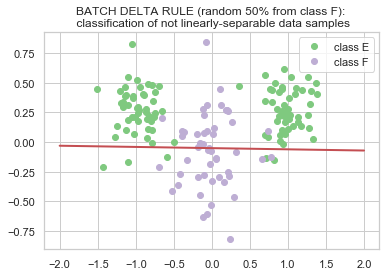

In [35]:
w1a50F=delta_rule(inputs, targets, weights, eta, epochs)[0][0][0]
w1b50F=delta_rule(inputs, targets, weights, eta, epochs)[0][0][1]
w1c50F=delta_rule(inputs, targets, weights, eta, epochs)[0][0][2]

x=np.linspace(-2,2,100)
y_batchdeltanotlinsep50F=(-1/w1b50F)*(w1a50F*x+w1c50F)

sns.set(style="whitegrid")
sns.set_palette("Accent")
plt.plot(classE_50F[0], classE_50F[1], 'o')
plt.plot(classF_50F[0], classF_50F[1], 'o')
plt.plot(x, y_batchdeltanotlinsep50F, 'r-', lw=2)
plt.legend(['class E','class F'])
plt.title('BATCH DELTA RULE (random 50% from class F): \n classification of not linearly-separable data samples')
plt.show()

(d) 20% from a subset of classE for which classE(1,:)<0 and 80% from a
subset of classE for which classE(1,:)>0

In [36]:
# %

# concatenate and shuffe samples

# plot the new dataset learning curve

**Conclusion of part 2: Classification of samples that are not linearly separable**

we took delta rule bc it seemed better, the classification isn't convincing tho, especially for the class E that is in two parts. A two-layer perceptron might be better to separate the data properly and that's what we will test in the next part.



## <p> &#127804; 2 Classification and regression with a two-layer perceptron </p>
### <p> &#127793; 2.1 Classification of not linearly separable data </p>

Test a two-layer perceptron trained with backprop (the generalized Delta rule) and examine how well it performs in separating the two classes. In particular, conduct the following experiments:

1. **Part 1: Effect the size of the hidden layer on the performance**

Modify the number of hidden nodes and demonstrate the effect the size of the hidden layer has on the performance (both the mean squared error and the number/ratio of misclassifications). How many hidden nodes do you need to perfectly separate all the available data (if manageable at all given your data randomisation)? How quickly does the learning converge depending on the learning rate?

2. **Part 2: Only a subset of data points is available for training a network**

subsample the data in the same way as in the second part of section 3.1.3 and the removed samples treat as a validation
set. Make sure you do not use this hold-out set in the training process and instead you only use it to calculate the error (mean squared error or the ratio of misclassifications) at different stages/epochs of learning to monitor the progress. In this configuration, you can address the following tasks and questions:

- How do the learning/error curves for the training and the validation sets compare? Are they similar? In what cases do you observe more dissimilarity?
- How do these curves and the network performance depend on the size of the hidden layer in various training/validation data configurations (the aforementioned subsampling options)?
- Is there any difference between a batch and sequential learning approach in terms of the validation performance?
- Make an attempt at approximating the resulting decision boundary, i.e. where the network output is 0 (between the target labels of -1 and 1 for two classes, respectively).

**REMINDERS of Perceptron history**

Despite some early sensations from the public, perceptron’s popularity faded away quietly because of its limitations. In 1969, Marvin Minsky and Seymour Papert discussed these limitations, including perceptron’s *inability to learn an XOR* (exclusive-or) gate (so basically a *single-layer perceptron* with step function cannot understand the logic that the weather has to be either hot or cold, but not both). And these logic gates like AND, OR, NOT, XOR are very important concepts that are powering your computer !

Of course, later people realized that *multi-layer perceptrons* are capable of *learning the logic of an XOR gate*, but they require something called backpropagation for the network to learn from trials and errors. After all, remember that deep learning neural networks are data-driven. If we have a model and its actual output is different from the desired output, we need a way to back-propagate the error information along the neural network to tell weights to adjust and correct themselves by a certain value so that gradually the actual output from the model gets closer to the desired output after rounds and rounds of testing.

As it turns out, for more complicated tasks that involve outputs which cannot be produced from a *linear combination* of inputs (so the outputs are non-linear or not linearly separable), step function won’t work because it doesn’t support backpropagation, which require the chosen activation function to have meaningful derivative.

(Text from [Introducing Deep Learning and Neural Networks — Deep Learning for Rookies (1) by Nahua Kang
](https://towardsdatascience.com/introducing-deep-learning-and-neural-networks-deep-learning-for-rookies-1-bd68f9cf5883))


**REMINDERS for other stuffs / todo au propre**

- transfert function / activation function phi
- forward / backward pass
- efficient backprop
- MAE / MSE
- schema backprop
- schema XOR

**REMINDERS from the lab document**

(Page 5 to 8 of the lab doc)
<img src="img/phi_forwardpass.png" width="950" align="center"/>

<img src="img/backwardpass_weights2.png" width="950" align="center"/>

<img src="img/errorseval.png" width="950" align="center"/>



In [37]:
def generate_nonlinear_data(transp = False):
    mean1 = [-2.5,2]
    mean2 = [0,0]
    mean3 = [3,1.7]
    cov1 = [0.5,0],[0,1]
    cov2 = [0.6,0],[0,4]
    cov3 = [1,0],[0,2]
    size = [100]
    data1 = np.random.multivariate_normal(mean1, cov1, size)
    data2 = np.random.multivariate_normal(mean2, cov2, size)
    data3 = np.random.multivariate_normal(mean3, cov3, size)
    labels1 = np.ones((100,1))
    labels2 = np.ones((100,1))*-1
    labels3 = labels1 #merge 1 and 2
    data1 = np.hstack((data1, np.ones((100,1)), labels1))
    data2 = np.hstack((data2, np.ones((100,1)),labels2))
    data3 = np.hstack((data3, np.ones((100,1)),labels3))
    data = np.vstack((data1, data2, data3))
    data = shuffle(data)
    if transp:
        data = np.transpose(data)
    return data

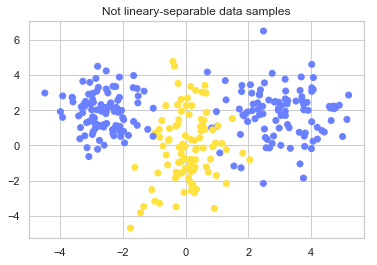

In [38]:
data = generate_nonlinear_data()
paletteperso2b = ["#FFE140", "#6A80FF"]
sns.set(style="whitegrid") 
plt.scatter(x = data[:,0], y = data[:,1], c = data[:,-1], cmap=clr.ListedColormap(sns.color_palette(paletteperso2b).as_hex()))
plt.title('Not lineary-separable data samples')
plt.show()

In [39]:
# =====================
# TWO LAYERS PERCEPTRON
# =====================
epochs = 100 #otherwise it takes the previous one

class NN_MLP():
    def __init__(self, inputsmlp, outputmlp, hidden_nodes, output_nodes):
        self.hidden_nodes = hidden_nodes
        self.outputmlp = outputmlp
        self.inputsmlp = inputsmlp
        self.output_nodes = output_nodes
        self.errors = []
        
        self.layer1 = np.random.normal(0, 1, [hidden_nodes, np.shape(inputsmlp)[0]])
        self.layer2 = np.random.normal(0, 1, [output_nodes, hidden_nodes+1])
        self.update1 = np.zeros(np.shape(self.layer1))
        self.update2 = np.zeros(np.shape(self.layer2))
                
    # (1) Phi formula p5
    # non-linear transfer function phi
    def transfer(self,x):
        return 2/(1+np.exp(-x))-1
    # non-linear transfer function phi derivative
    def transfer_derivative(self,x):
        return ((1+self.transfer(x))*(1-self.transfer(x)))/2
    
    # (2) Matlab code p6
    # takes input, passes it throught the two layers, gives an output
    def forward_pass(self, inputsmlp):
        bias = np.ones((1,np.shape(inputsmlp)[1]))
        hin = np.dot(self.layer1, inputsmlp)
        hout = np.vstack((self.transfer(hin), bias))
        oin = np.dot(self.layer2, hout)
        oout = self.transfer(oin)
        return hout, oout
    
    # (3) Matlab code p7
    # takes targets and outputs, passes it throught the hidden layers, gives the error
    def backwards_pass(self, hout, oout):   
        delta_out  = np.multiply((oout - self.outputmlp),self.transfer_derivative(oout)) # delta = (output - target) * phi'(output)
        delta_hidden = np.multiply(np.dot(np.transpose(self.layer2), delta_out),
                                   self.transfer_derivative(hout))[:-1,:]
        return delta_out, delta_hidden
    
    # (4) Matlab code p8
    # update weights according the learning rate (eta) and alpha
    def update_weights(self, learning_rate, momentum):
        hout, oout = self.forward_pass(self.inputsmlp)
        delta_out, delta_hidden = self.backwards_pass(hout, oout)
        self.update1 = np.multiply(momentum,self.update1)-np.multiply((1-momentum),np.dot(delta_hidden,np.transpose(self.inputsmlp)))
        self.update2 = np.multiply(momentum,self.update2)-np.multiply((1-momentum),np.dot(delta_out, np.transpose(hout)))
        self.layer1 += np.multiply(learning_rate,self.update1)
        self.layer2 += np.multiply(learning_rate,self.update2)
    
    # Mean Squared Errors
    def calculate_mse(self, inputsmlp, outputmlp, classification = True):
        prediction = self.predict(inputsmlp, classification)
        error = np.square(prediction - outputmlp)
        return np.average(error)
    
    def predict(self, inputsmlp, classification = True):
        _ , prediction = self.forward_pass(inputsmlp)
        if classification:
            prediction[prediction > 0] = 1
            prediction[prediction <= 0] = -1
        return prediction
    
    def train(self, iterations, learning_rate, momentum, classification = True):
        for iteration in range(iterations):
            self.update_weights(learning_rate, momentum)
            error = self.calculate_mse(self.inputsmlp, self.outputmlp, classification)
            self.errors.append(error)
            
    # PLOT LEARNING RATE CURVE
    def plot_learning_rate(self):
        plt.plot(self.errors)
        plt.xlabel("Epochs")
        plt.ylabel("Error")
        plt.title('TWO-LAYER PERCEPTRON: learning curve for backpropagation ')
        plt.show()
        plt.show()
    
    # PLOT CLASSIFICATION
    def plot_decision_boundary(self, points = True, h = 0.1):
        cmap_light = ListedColormap(['#f8efcd', '#cfcfff']) # background colors
        x_min, x_max = self.inputsmlp[0, :].min() - 1, self.inputsmlp[0, :].max() + 1
        y_min, y_max = self.inputsmlp[1, :].min() - 1, self.inputsmlp[1, :].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
        grid_data = np.transpose(np.c_[xx.ravel(), yy.ravel()])
        ones = np.transpose(np.ones((np.shape(xx)[1]*np.shape(xx)[0],1)))
        grid_data = np.vstack((grid_data,ones))
        Z = self.predict(grid_data)
        Z = Z.reshape(xx.shape)      
        plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8) #cmap=plt.cm.Paired
        if points:
            plt.scatter(self.inputsmlp[0, :], self.inputsmlp[1, :], c = self.outputmlp, cmap=clr.ListedColormap(sns.color_palette(paletteperso2b).as_hex()))
        plt.title('Classification for not linearly-separable data samples')
        plt.show()

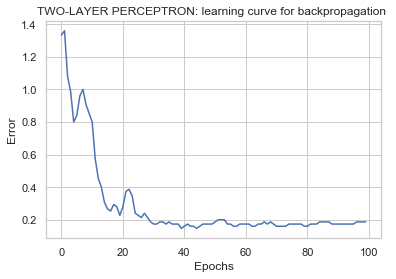

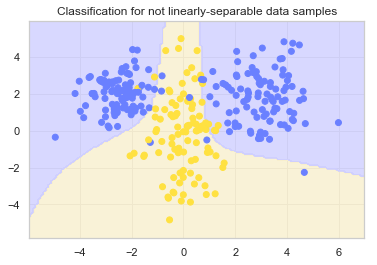

In [56]:
# config test (between 15-30 hidden nodes seems ok or maybe it's too much idk, we should check the errors/misclassifications)
data = generate_nonlinear_data(transp=True)
perceptrontwolayers = NN_MLP(data[:-1,:], data[-1,:], hidden_nodes = 30, output_nodes = 1)
perceptrontwolayers.train(100, 0.01, 0.9)
perceptrontwolayers.plot_learning_rate()

perceptrontwolayers.plot_decision_boundary()

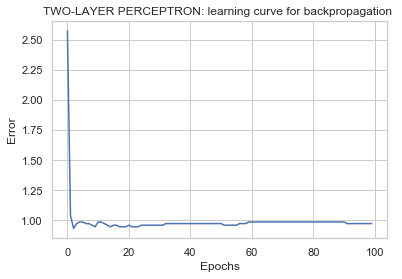

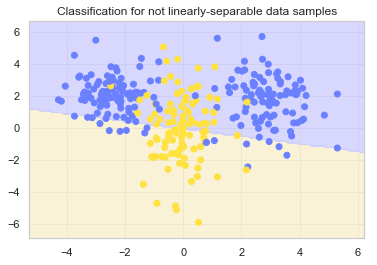

In [41]:
# config 1 hidden node (not good, same as earlier)
data = generate_nonlinear_data(transp=True)
perceptrontwolayers = NN_MLP(data[:-1,:], data[-1,:], hidden_nodes = 1, output_nodes = 1)
perceptrontwolayers.train(100, 0.01, 0.9)
perceptrontwolayers.plot_learning_rate()

perceptrontwolayers.plot_decision_boundary()

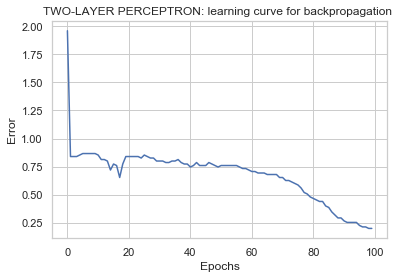

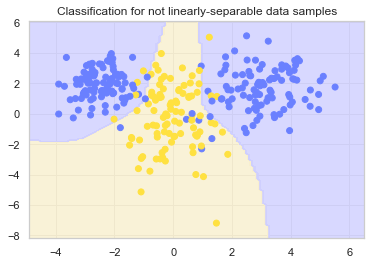

In [42]:
# config 10 hidden node (it starts to be ok from 10 hidden nodes I would say)
data = generate_nonlinear_data(transp=True)
perceptrontwolayers = NN_MLP(data[:-1,:], data[-1,:], hidden_nodes = 10, output_nodes = 1)
perceptrontwolayers.train(100, 0.01, 0.9)
perceptrontwolayers.plot_learning_rate()

perceptrontwolayers.plot_decision_boundary()

**Conclusion on parameters**

Number of hidden nodes: One node is equivalent to the perceptron situation we had before (we cannot separate not lineary separable data sample with a line duhhh thanks captain obvious). Too many hidden nodes seems to lead to overfitting

Learning rate (eta): too high = error divergance, too small = not reaching global minima (I used 0.01)

<img src="img/learningrate.png" width="500" align="center"/>


### <p> &#127793; 2.2 The encoder problem </p>

## <p> &#127804; 3 Function approximation </p>
### <p> &#127793; 3.1 Generate function data </p>

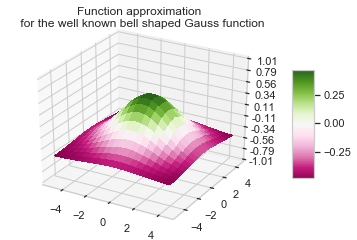

In [43]:
# "the well known bell shaped Gauss function" from p13
def wellknown_bellshaped_Gaussfunction(x, y):
    exposant=x**2+y**2 
    return np.exp(-(exposant)/10)-0.5


# data from p14
x = np.arange(-5,5, 0.5)
y = np.arange(-5,5, 0.5)
x_test = np.arange(-5,5, 0.5) + 0.25
y_test = np.arange(-5,5, 0.5) + 0.25

X1, Y1 = np.meshgrid(x, y)
X1_test, Y1_test = np.meshgrid(x_test, y_test)

Z = wellknown_bellshaped_Gaussfunction(X1, Y1)
Z_test = wellknown_bellshaped_Gaussfunction(X1_test, Y1_test)
ndata = len(X1) * len(Y1)
ndata_test = len(X1_test) * len(Y1_test)


# plot surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X1, Y1, Z, cmap=cm.PiYG, linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01) # z axis
ax.zaxis.set_major_locator(LinearLocator(10)) # z axis
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f')) # z axis
fig.colorbar(surface, shrink=0.5, aspect=5) # colorbar
plt.title('Function approximation \n for the well known bell shaped Gauss function')
plt.show()

In [44]:
# Train the network with the perceptron and then visualise the function

# =====================
# TWO LAYERS PERCEPTRON
# =====================
epochs = 100 #otherwise it takes the previous one

class NN_MLP():
    def __init__(self, inputsmlp, outputmlp, hidden_nodes, output_nodes):
        self.hidden_nodes = hidden_nodes
        self.outputmlp = outputmlp
        self.inputsmlp = inputsmlp
        self.output_nodes = output_nodes
        self.errors = []
        
        self.layer1 = np.random.normal(0, 1, [hidden_nodes, np.shape(inputsmlp)[0]])
        self.layer2 = np.random.normal(0, 1, [output_nodes, hidden_nodes+1])
        self.update1 = np.zeros(np.shape(self.layer1))
        self.update2 = np.zeros(np.shape(self.layer2))
                
    # (1) Phi formula p5
    # non-linear transfer function phi
    def transfer(self,x):
        return 2/(1+np.exp(-x))-1
    # non-linear transfer function phi derivative
    def transfer_derivative(self,x):
        return ((1+self.transfer(x))*(1-self.transfer(x)))/2
    
    # (2) Matlab code p6
    # takes input, passes it throught the two layers, gives an output
    def forward_pass(self, inputsmlp):
        bias = np.ones((1,np.shape(inputsmlp)[1]))
        hin = np.dot(self.layer1, inputsmlp)
        hout = np.vstack((self.transfer(hin), bias))
        oin = np.dot(self.layer2, hout)
        oout = self.transfer(oin)
        return hout, oout
    
    # (3) Matlab code p7
    # takes targets and outputs, passes it throught the hidden layers, gives the error
    def backwards_pass(self, hout, oout):   
        delta_out  = np.multiply((oout - self.outputmlp),self.transfer_derivative(oout)) # delta = (output - target) * phi'(output)
        delta_hidden = np.multiply(np.dot(np.transpose(self.layer2), delta_out),
                                   self.transfer_derivative(hout))[:-1,:]
        return delta_out, delta_hidden
    
    # (4) Matlab code p8
    # update weights according the learning rate (eta) and alpha
    def update_weights(self, learning_rate, momentum):
        hout, oout = self.forward_pass(self.inputsmlp)
        delta_out, delta_hidden = self.backwards_pass(hout, oout)
        self.update1 = np.multiply(momentum,self.update1)-np.multiply((1-momentum),np.dot(delta_hidden,np.transpose(self.inputsmlp)))
        self.update2 = np.multiply(momentum,self.update2)-np.multiply((1-momentum),np.dot(delta_out, np.transpose(hout)))
        self.layer1 += np.multiply(learning_rate,self.update1)
        self.layer2 += np.multiply(learning_rate,self.update2)
    
    # Mean Squared Errors
    def calculate_mse(self, inputsmlp, outputmlp, classification = True):
        prediction = self.predict(inputsmlp, classification)
        error = np.square(prediction - outputmlp)
        return np.average(error)
    
    def predict(self, inputsmlp, classification = True):
        _ , prediction = self.forward_pass(inputsmlp)
        if classification:
            prediction[prediction > 0] = 1
            prediction[prediction <= 0] = -1
        return prediction
    
    def train(self, iterations, learning_rate, momentum, classification = True):
        for iteration in range(iterations):
            self.update_weights(learning_rate, momentum)
            error = self.calculate_mse(self.inputsmlp, self.outputmlp, classification)
            self.errors.append(error)
            
    # PLOT LEARNING RATE CURVE
    def plot_learning_rate(self):
        plt.plot(self.errors)
        plt.xlabel("Epochs")
        plt.ylabel("Error")
        plt.title('TWO-LAYER PERCEPTRON: learning curve for backpropagation ')
        plt.show()
        plt.show()
    
    # PLOT CLASSIFICATION
    def plot_decision_boundary(self, points = True, h = 0.1):
        cmap_light = ListedColormap(['#f8efcd', '#cfcfff']) # background colors
        x_min, x_max = self.inputsmlp[0, :].min() - 1, self.inputsmlp[0, :].max() + 1
        y_min, y_max = self.inputsmlp[1, :].min() - 1, self.inputsmlp[1, :].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
        grid_data = np.transpose(np.c_[xx.ravel(), yy.ravel()])
        ones = np.transpose(np.ones((np.shape(xx)[1]*np.shape(xx)[0],1)))
        grid_data = np.vstack((grid_data,ones))
        Z = self.predict(grid_data)
        Z = Z.reshape(xx.shape)      
        plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8) #cmap=plt.cm.Paired
        if points:
            plt.scatter(self.inputsmlp[0, :], self.inputsmlp[1, :], c = self.outputmlp, cmap=clr.ListedColormap(sns.color_palette(paletteperso2b).as_hex()))
        plt.title('Classification for not linearly-separable data samples')
        plt.show()

    # PLOT APPROXIMATION FUNCTION
    def approxfunct(self):
        for i in range(np.shape(self.outputmlp)[0]):
            if i%1000 == 0:
                zz = self.outputmlp[i].reshape(i+1,i+1) #.reshape(1,1) #issue with array dimentions compatibility
                fig = plt.figure()
                ax = fig.add_subplot(111, projection='3d')

                # Plot the surface.
                surface = ax.plot_surface(X1, Y1, zz, cmap=cm.PiYG, linewidth=0, antialiased=False)
                ax.set_zlim(-1.01, 1.01) # z axis
                ax.zaxis.set_major_locator(LinearLocator(10)) # z axis
                ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f')) # z axis
                fig.colorbar(surface, shrink=0.5, aspect=5) #color
                plt.title('Function approximation for the perceptron learning')
                plt.show()
        

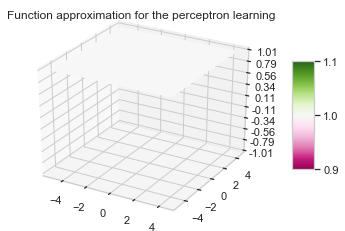

In [45]:
data = generate_nonlinear_data(transp=True)
perceptrontwolayers = NN_MLP(data[:-1,:], data[-1,:], hidden_nodes = 30, output_nodes = 1)
perceptrontwolayers.train(100, 0.01, 0.9)
perceptrontwolayers.approxfunct()

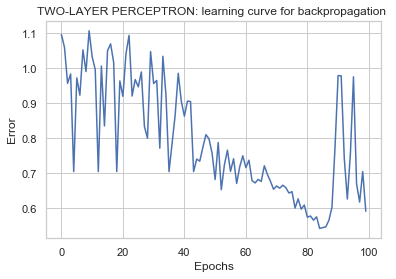

0.5917354300539563

In [46]:
step = 0.25
xx, yy = np.meshgrid(np.arange(-5, 5, step),np.arange(-5, 5, step))
grid_data = np.c_[xx.ravel(), yy.ravel()]
ones = np.ones((np.shape(xx)[0]*np.shape(xx)[1],1))
z = (np.exp(-(grid_data[:,0]**2+grid_data[:,1]**2)/10)-0.5).reshape(len(ones),1)
grid_data = np.transpose(np.hstack((grid_data,ones,z)))

perceptrontwolayers = NN_MLP(grid_data[:-1,:], grid_data[-1,:], 20, 1)
perceptrontwolayers.train(100,0.01, 0.9)
perceptrontwolayers.plot_learning_rate()
perceptrontwolayers.errors[-1]

### <p> &#127793; 3.2 Train the network and visualise the approximated function </p>

### <p> &#127793; 3.3 Evaluate generalisation performance </p>

***
# <p> &#127802; Assignment - Part II </p>

### <p> &#127793; 1. Two-layer perceptron for time series prediction - model selection, regularisation and validation </p>

### <p> &#127793; 2. Three-layer perceptron for noisy time series prediction - generalisation </p>

***
# <p> &#127802; Conclusions </p>